In [20]:
!pip install missingno
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['axes.edgecolor']='#FA6E4F'
plt.rcParams['font.family'] = 'monospace'
import seaborn as sns
import geopandas as gpd
import missingno as msno
import re

import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


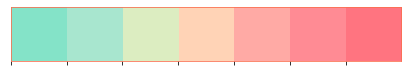

In [21]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette1 = sns.color_palette(long_palette)

short_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D"]
custom_palette2 = sns.color_palette(short_palette)

watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)

research_palette = ['#FA6E4F','#8EC9BB']

student_faculty_palette = ['#003f5c','#ff6361']

international_palette = ['#ffcf6a','#628d82']
sns.palplot(sns.color_palette(long_palette))
sns.palplot(sns.color_palette(short_palette))
sns.palplot(sns.color_palette(watermelon_colors))

In [22]:
university_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/QS%20World%20University%20Rankings%202017%20-%202022/qs-world-university-rankings-2017-to-2022-V2.csv")

In [23]:
university_df.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [24]:
university_df.shape

(6482, 15)

In [25]:
university_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [26]:
pd.DataFrame(university_df.isnull().sum(), columns=['No. of Missing values'])

,No. of Missing values
university,0
year,0
rank_display,68
score,3662
link,0
country,0
city,178
region,0
logo,0
type,12


In [27]:
missing_percent = round(university_df.isna().mean() * 100, 1)
pd.DataFrame(missing_percent[missing_percent > 0], columns=['% of Missing Values'])

,% of Missing Values
rank_display,1.0
score,56.5
city,2.7
type,0.2
student_faculty_ratio,1.2
international_students,2.5
faculty_count,1.2


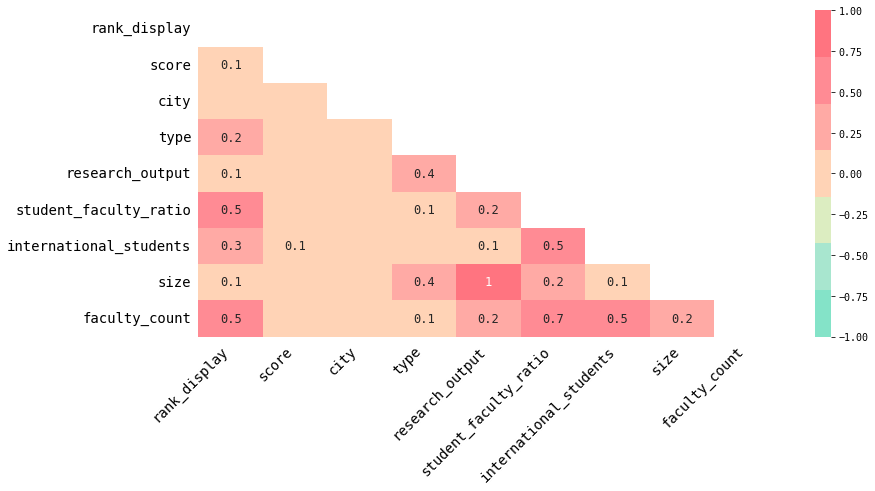

In [28]:
cmap = ListedColormap(custom_palette3, name='cmap1')
msno.heatmap(university_df, cmap=cmap, figsize=(13, 6), fontsize=14);

In [29]:
print(len(university_df[university_df.isnull().sum(axis=1) > 4]))
drop_index = university_df[university_df.isnull().sum(axis=1) > 4].index.tolist()
university_df.drop(drop_index, inplace=True)
print('Rows which have more than 4 null values have been dropped!')

22
Rows which have more than 4 null values have been dropped!


In [30]:
university_df.drop(['link', 'logo', 'score'], axis=1, inplace=True)

In [31]:
university_df['research_output'] = university_df['research_output'].replace('Very high', 'Very High')
university_df['international_students'] = university_df['international_students'].apply(lambda x: float(str(x).replace(',','')))
university_df['faculty_count'] = university_df['faculty_count'].apply(lambda x: float(str(x).replace(',','')))
university_df['rank_display'] = university_df['rank_display'].apply(lambda x: float(re.sub(r'\W+', '', str(x))))

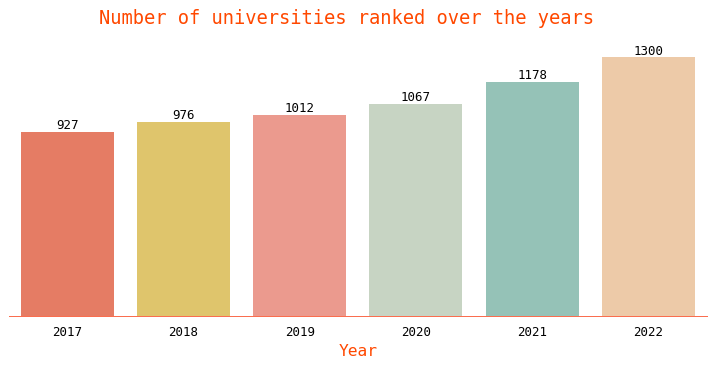

In [32]:
year_df = university_df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=university_df, x='year', palette=custom_palette1);

ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize=13, color = '#ff4800');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = '#ff4800');

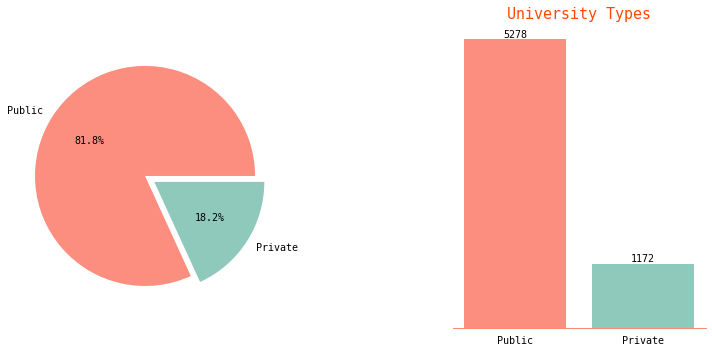

In [33]:
type_df = university_df['type'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

pie_bar_colors = ['#FB8E7E','#8EC9BB']
explode = [0,0.1]
ax1.pie(university_df['type'].value_counts().values, labels = university_df['type'].value_counts().index, explode=explode, colors=pie_bar_colors, autopct='%1.1f%%') 
ax1.axis('equal')

ax2.bar(university_df['type'].value_counts().index, university_df['type'].value_counts().values, color=pie_bar_colors) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("University Types", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])

fig.tight_layout()
fig.subplots_adjust(wspace=0.7)

In [34]:
print('Number of countries with ranked universities: ',university_df['country'].nunique())

Number of countries with ranked universities:  97


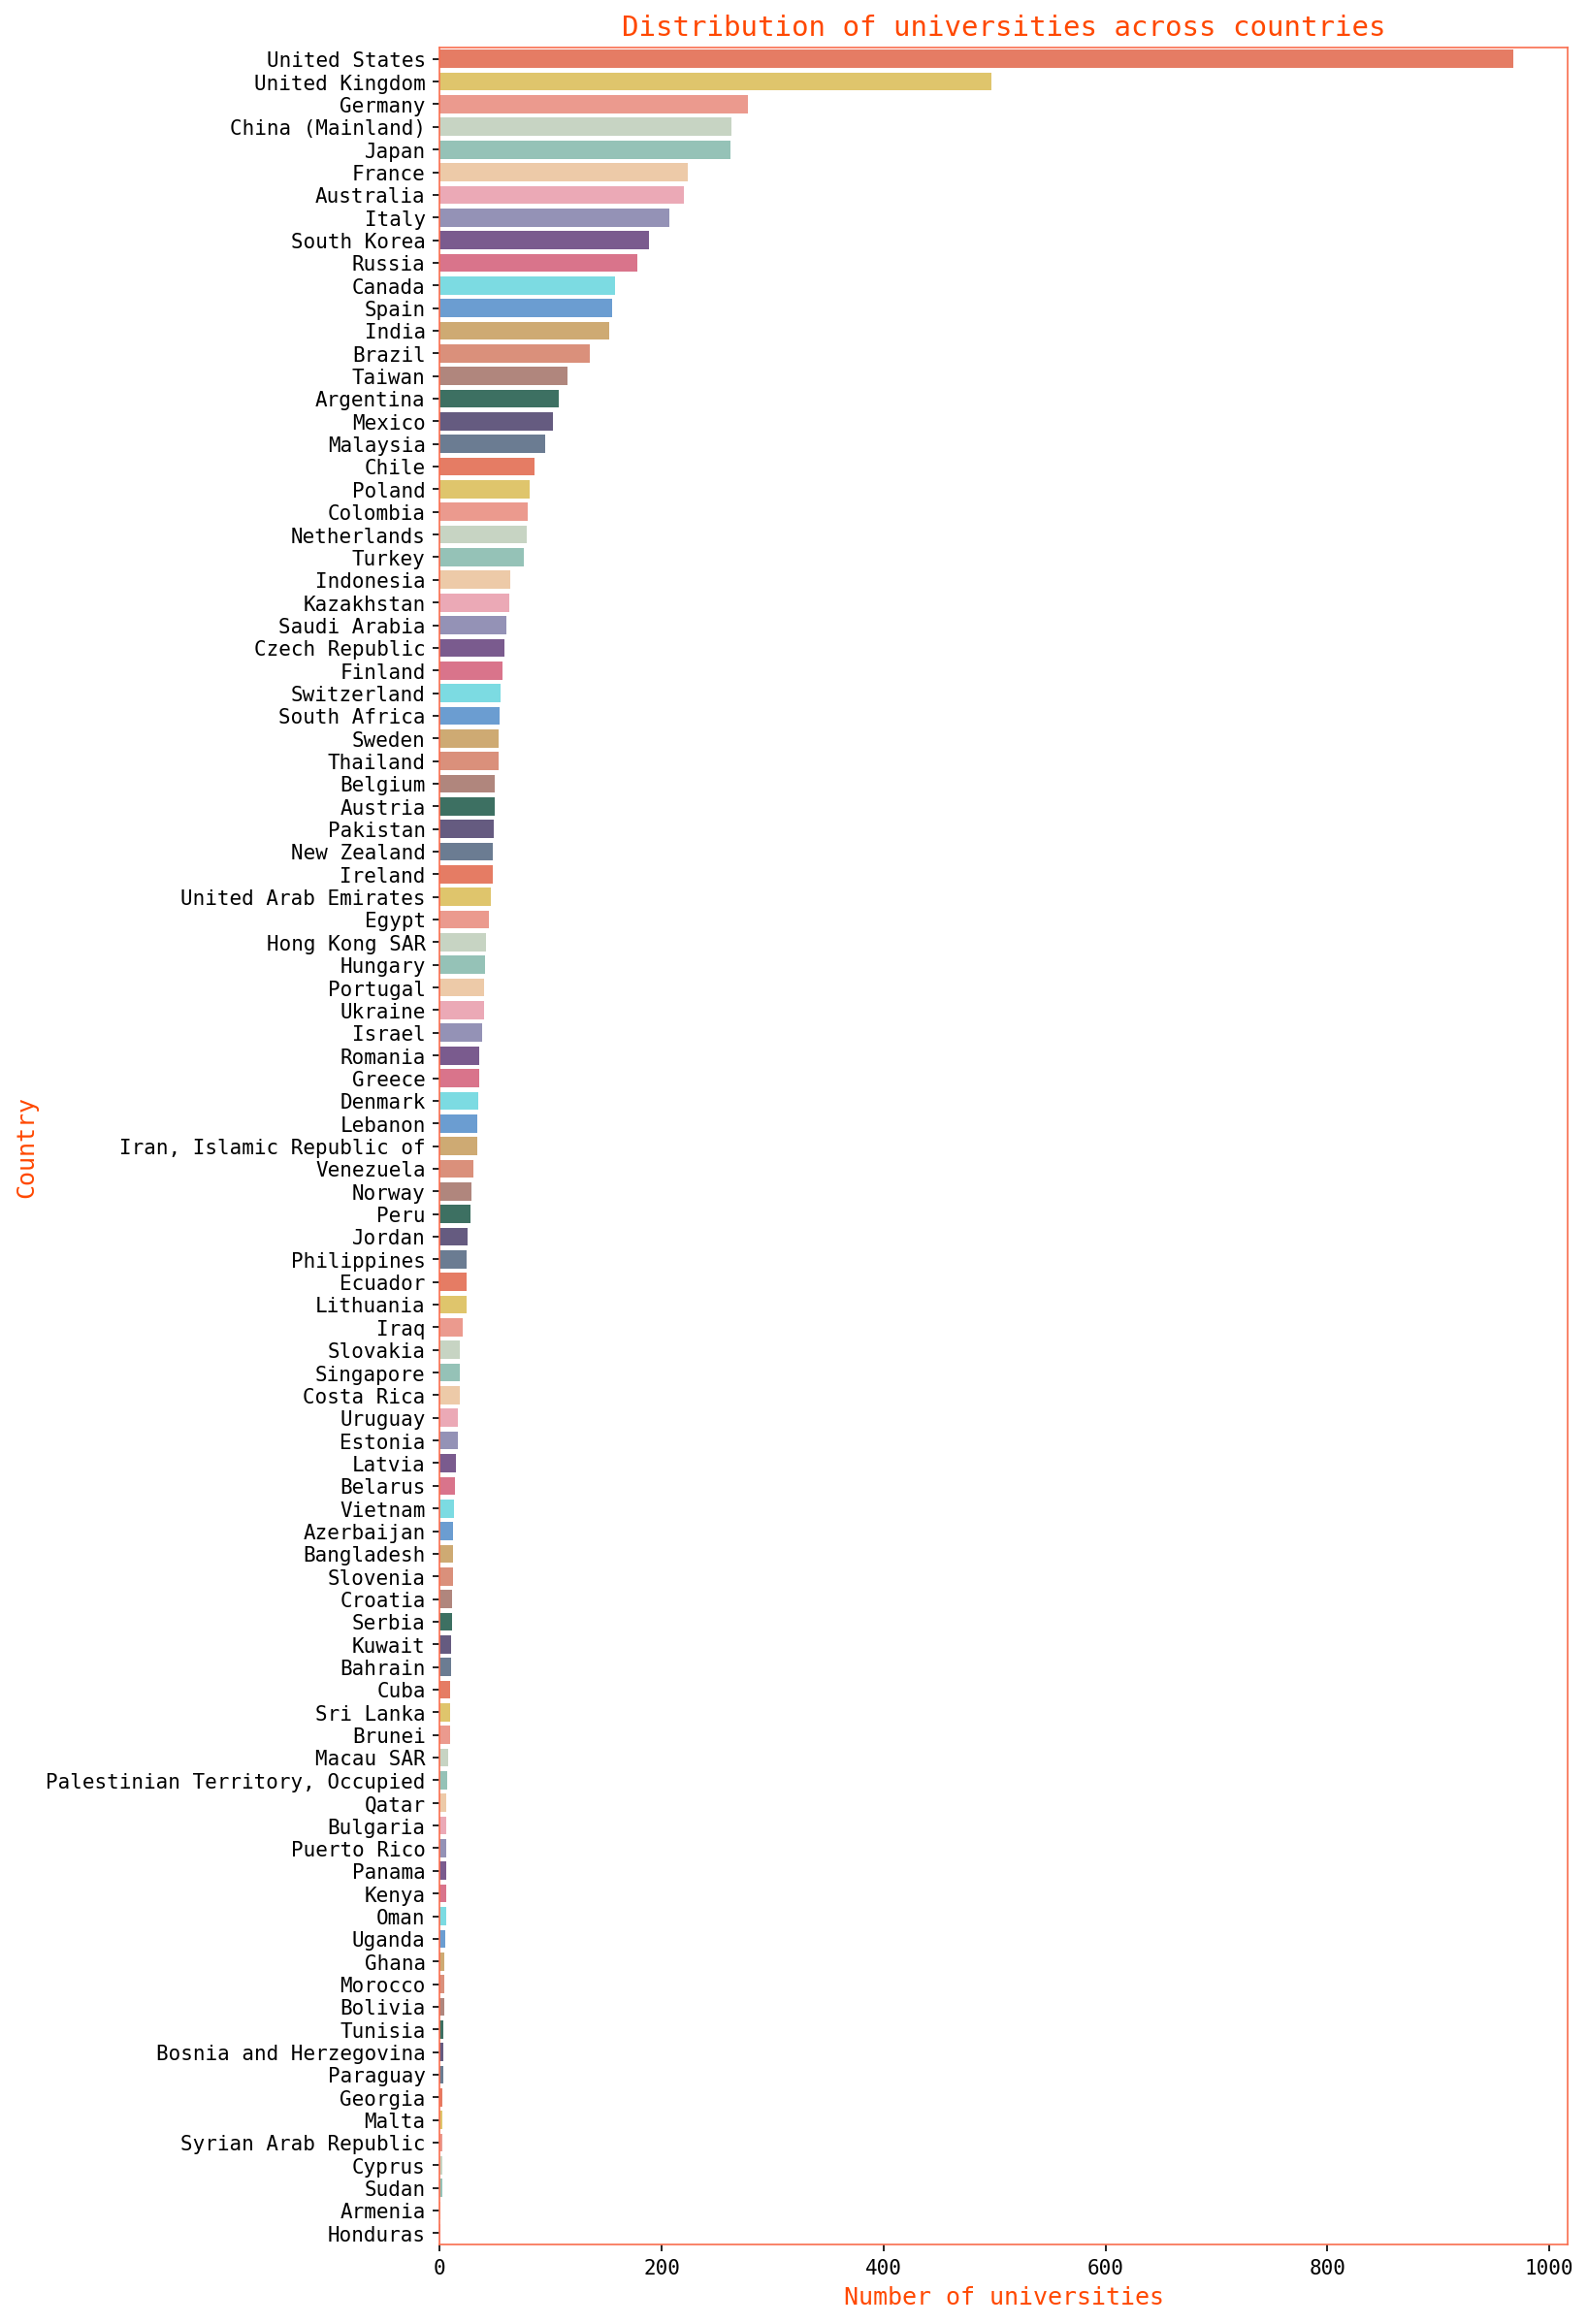

In [36]:
uni_df = university_df['university'].value_counts()

fig, ax = plt.subplots(figsize=(10,20), dpi=150)

sns.countplot(data=university_df, y='country', order=university_df.country.value_counts().index, palette=custom_palette1);
plt.xlabel('Number of universities', fontsize=12, color = '#ff4800')
plt.ylabel('Country', fontsize=12, color = '#ff4800')
plt.title("Distribution of universities across countries", fontsize=14, color = '#ff4800');

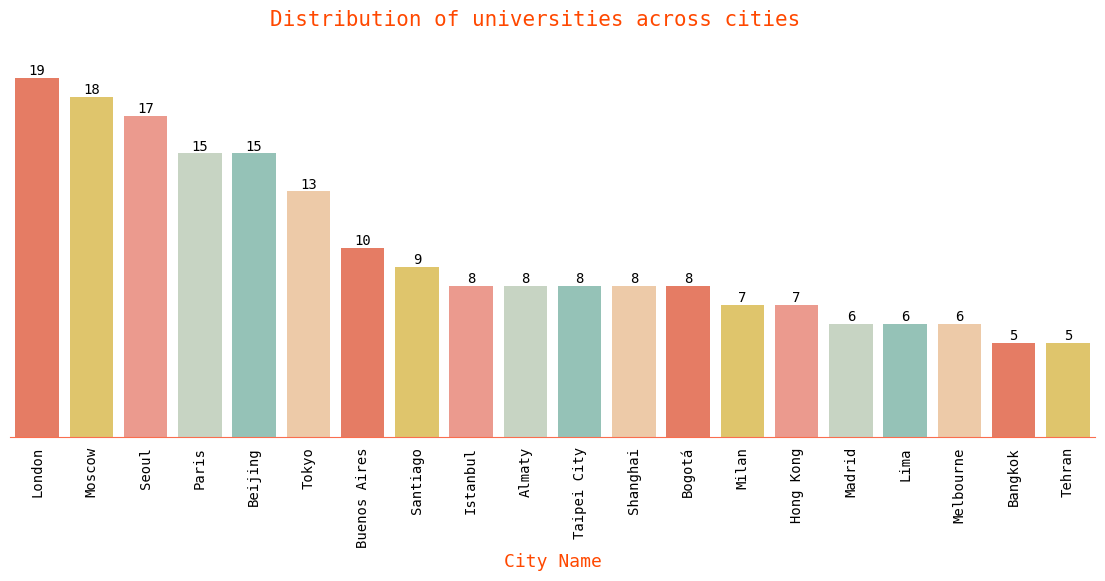

In [37]:
sorted_df = university_df.sort_values(by='rank_display').drop_duplicates('university')
sorted_df = pd.DataFrame(sorted_df['city'].value_counts()[:20])
fig, ax = plt.subplots(figsize=(14,5), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.barplot(data=sorted_df, y='city', x=sorted_df.index, palette=custom_palette2)
plt.xticks(rotation=90);

ax.bar_label(ax.containers[0])

ax.set_xlabel('City Name', fontsize=13, color = '#ff4800');
fig.suptitle('Distribution of universities across cities', fontsize=15, color = '#ff4800');

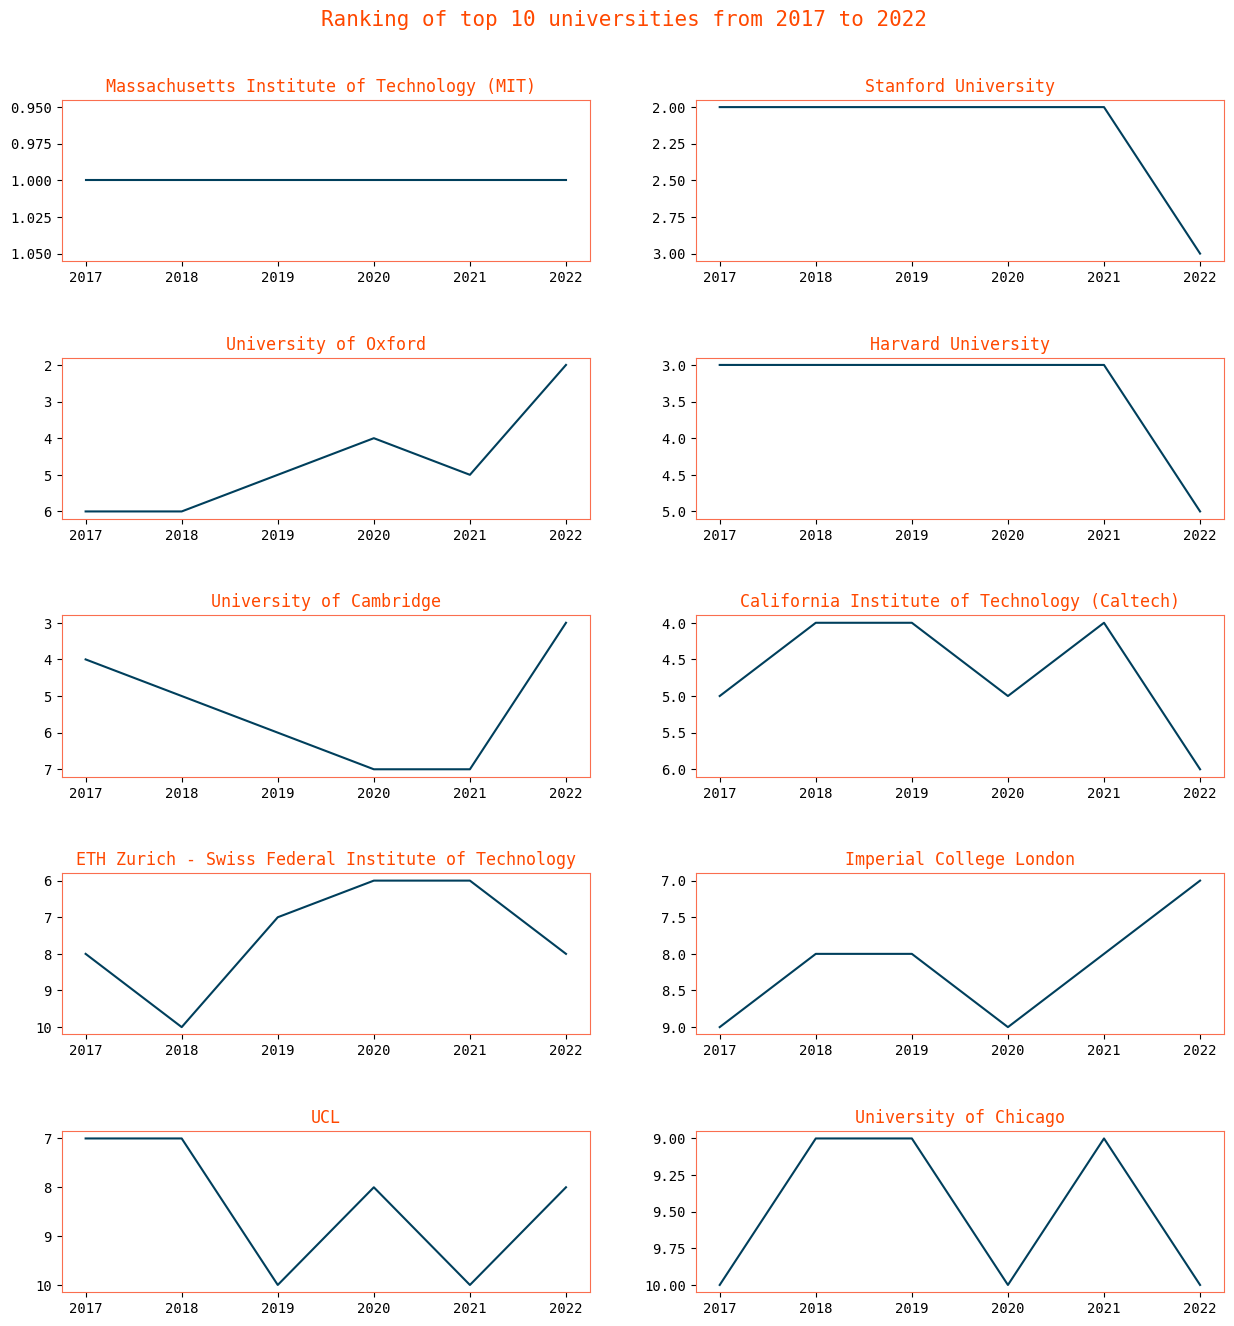

In [38]:

top_unis = ['Massachusetts Institute of Technology (MIT) ', 'Stanford University', 'University of Oxford', 'Harvard University', 'University of Cambridge', 'California Institute of Technology (Caltech)', 'ETH Zurich - Swiss Federal Institute of Technology', 'Imperial College London', 'UCL', 'University of Chicago']
topunis_df = university_df[university_df['university'].isin(top_unis)][['year','university','rank_display']].reset_index(drop=True)
fig = plt.figure(figsize=(15,15), dpi=100)

for uni, i in zip(top_unis, range(1, 11)):
    new_df = topunis_df[topunis_df['university'] == uni]
    ax = fig.add_subplot(5, 2, i)
    ax.plot(new_df['year'], new_df['rank_display'], color='#003f5c', linewidth=1.5)
    plt.gca().invert_yaxis()
    ax.set_title(uni, color='#ff4800')
    
fig.subplots_adjust(wspace=0.2, hspace=0.6, top=0.92)
fig.suptitle('Ranking of top 10 universities from 2017 to 2022', fontsize=15, color = '#ff4800');

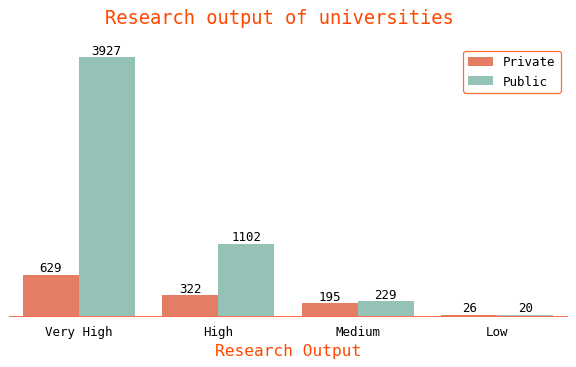

In [39]:

fig, ax = plt.subplots(figsize=(8,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=university_df, x='research_output', hue='type', palette=research_palette);

for container in ax.containers:
    ax.bar_label(container)

plt.legend(edgecolor='#ff4800');
ax.set_xlabel('Research Output', fontsize=13, color = '#ff4800');
fig.suptitle('Research output of universities', fontsize=15, color = '#ff4800');

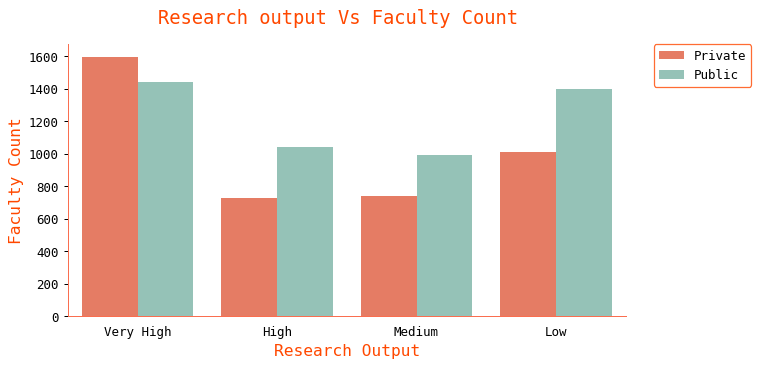

In [40]:
fig, ax = plt.subplots(figsize=(8,4), dpi=90)

sns.barplot(data=university_df, x='research_output', y='faculty_count', hue='type', ci=None, palette=research_palette)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)
ax.set_xlabel('Research Output', fontsize=13, color = '#ff4800')
ax.set_ylabel('Faculty Count', fontsize=13, color = '#ff4800')

ax.legend(edgecolor='#ff4800',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle('Research output Vs Faculty Count', fontsize=15, color = '#ff4800');

In [41]:
research_size = pd.DataFrame(university_df.groupby(['research_output']).apply(lambda df: df['size'].value_counts()))
research_size

size 
 
 
 research_output 
 
 
 
 
 
 
 High 
 L 
 767 
 
 
 XL 
 380 
 
 
 M 
 204 
 
 
 S 
 73 
 
 
 Low 
 M 
 20 
 
 
 L 
 10 
 
 
 S 
 10 
 
 
 XL 
 6 
 
 
 Medium 
 L 
 197 
 
 
 XL 
 106 
 
 
 M 
 99 
 
 
 S 
 22 
 
 
 Very High 
 L 
 2088 
 
 
 XL 
 1139 
 
 
 M 
 1066 
 
 
 S 
 273

In [42]:
research_size = research_size.reset_index().rename(columns={'level_1': 'size', 'size': 'count'})

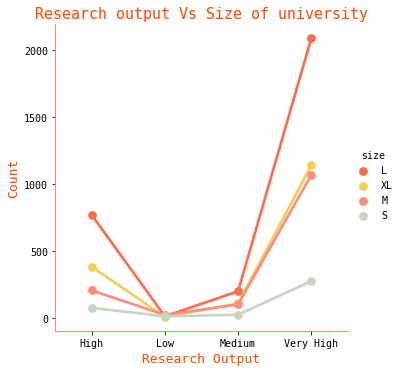

In [43]:
sns.catplot(x="research_output", y="count", kind="point", data=research_size, hue='size', palette=custom_palette1);
plt.xlabel('Research Output', fontsize=13, color = '#ff4800')
plt.ylabel('Count', fontsize=13, color = '#ff4800')
plt.title('Research output Vs Size of university', fontsize=15, color = '#ff4800');

In [44]:
university_df['student_faculty_ratio'].describe()

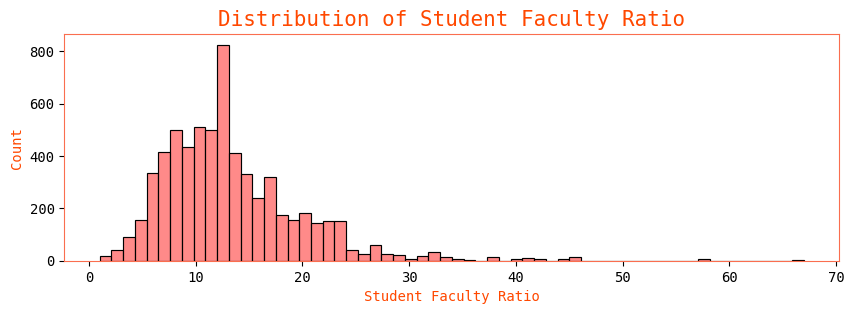

In [45]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=university_df, x='student_faculty_ratio', bins=60, color=student_faculty_palette[1]);
plt.xlabel('Student Faculty Ratio', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of Student Faculty Ratio', fontsize=15, color = '#ff4800');

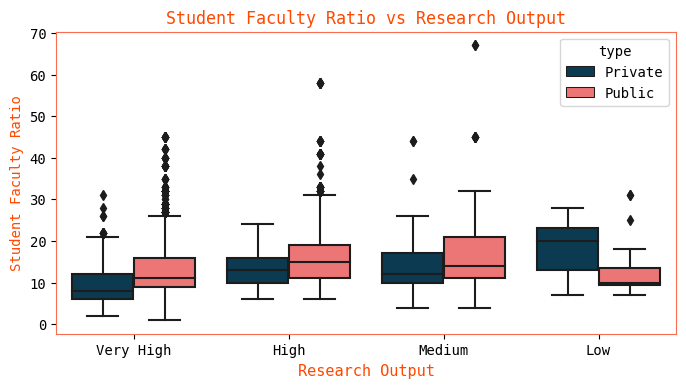

In [46]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data=university_df, y='student_faculty_ratio', x='research_output', hue='type', palette=student_faculty_palette);
plt.xlabel('Research Output', fontsize=11, color = '#ff4800')
plt.ylabel('Student Faculty Ratio',color = '#ff4800')
plt.title('Student Faculty Ratio vs Research Output', color = '#ff4800');

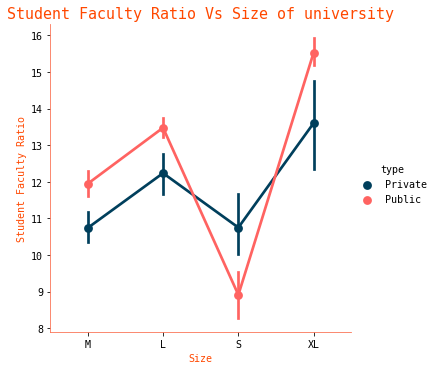

In [47]:
sns.catplot(x="size", y="student_faculty_ratio", kind="point", data=university_df, hue='type', palette=student_faculty_palette);
plt.xlabel('Size', color = '#ff4800')
plt.ylabel('Student Faculty Ratio', color = '#ff4800')
plt.title('Student Faculty Ratio Vs Size of university', fontsize=15, color = '#ff4800');

In [48]:
university_df['international_students'].describe()

In [49]:
university_df.iloc[university_df['international_students'].idxmax()]

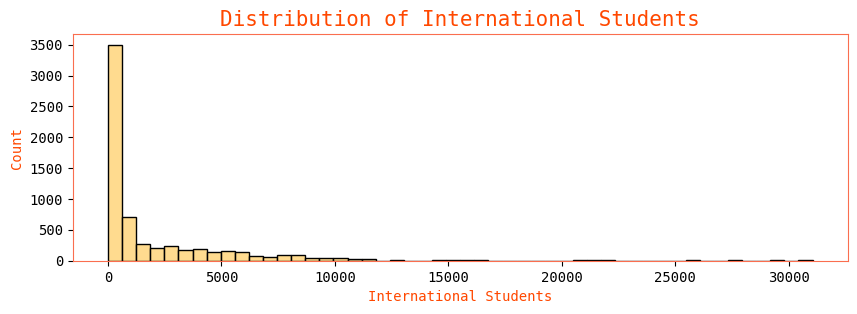

In [50]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=university_df, x='international_students', bins=50, color=international_palette[0]);
plt.xlabel('International Students', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of International Students', fontsize=15, color = '#ff4800');

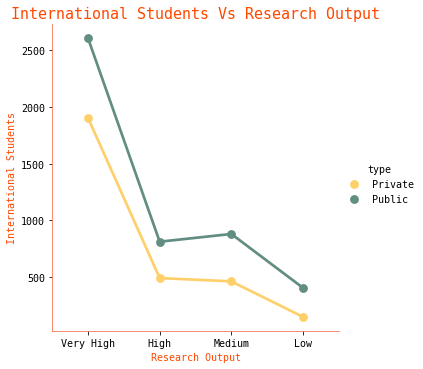

In [51]:
sns.catplot(kind='point', data=university_df, x='research_output', y='international_students', order=university_df['research_output'].value_counts().index, ci=None, hue='type', palette=international_palette);
plt.xlabel('Research Output', color = '#ff4800')
plt.ylabel('International Students', color = '#ff4800')
plt.title('International Students Vs Research Output', fontsize=15, color = '#ff4800');

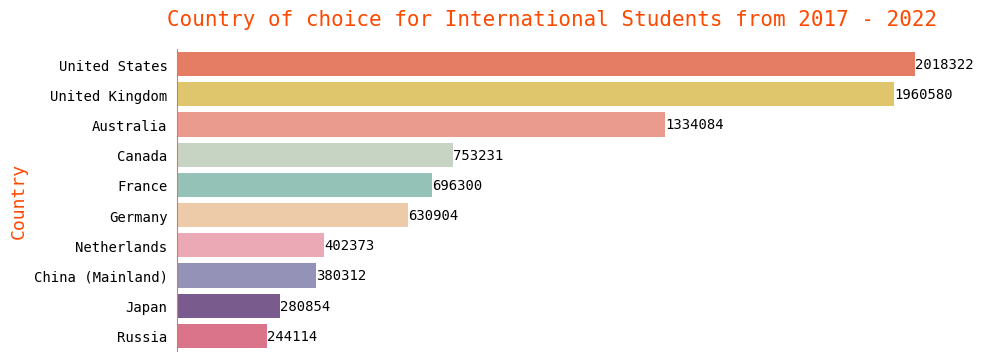

In [52]:
intstu_country = pd.DataFrame(university_df.groupby(['country'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])
fig, ax = plt.subplots(figsize=(10,4), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False)
ax.get_xaxis().set_visible(False)

sns.barplot(data=intstu_country, x='international_students', y=intstu_country.index, palette=custom_palette1);

ax.bar_label(ax.containers[0], fmt = '%d')

ax.set_ylabel('Country', fontsize=13, color = '#ff4800');
fig.suptitle('Country of choice for International Students from 2017 - 2022', fontsize=15, color = '#ff4800');